In [ ]:
import sys
import os
import math
import galsim
import matplotlib.pyplot as plt
import numpy as np

def make_disk(gal_flux,gal_r0,g1,g2):
    """
      - Use a sheared, exponential profile for the galaxy.
      - Convolve it by a circular Moffat PSF.
      - Add Poisson noise to the image.
    """

    psf_beta = 5       #
    psf_re = 0.2       # arcsec
    pixel_scale = 0.1  # arcsec / pixel
    sky_level = 2.5e3  # counts / arcsec^2

    random_seed = 1345
    rng = galsim.BaseDeviate(random_seed+1)

    # Define the galaxy profile.
    gal = galsim.Exponential(flux=gal_flux, scale_radius=gal_r0)

    gal = gal.shear(g1=g1, g2=g2)

    psf = galsim.Moffat(beta=psf_beta, flux=1., half_light_radius=psf_re)
    final = galsim.Convolve([gal, psf])

    # Draw the image with a particular pixel scale.
    image = final.drawImage(scale=pixel_scale)
    # The "effective PSF" is the PSF as drawn on an image, which includes the convolution
    # by the pixel response.  We label it epsf here.
    image_epsf = psf.drawImage(scale=pixel_scale)

    sky_level_pixel = sky_level * pixel_scale**2
    noise = galsim.PoissonNoise(rng, sky_level=sky_level_pixel)
    image.addNoise(noise)
    return image

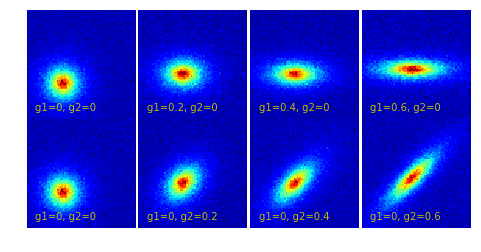

In [278]:
f = 1e5
r = 0.6
plt.figure(figsize=(8,4))
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(2,4,1)
image = make_disk(f,r,0,0)
plt.imshow(image.array[30:100,30:100],origin='lower',cmap='jet')
plt.text(5,5,'g1=0, g2=0',color='y')
plt.axis('off')

plt.subplot(2,4,2)
image = make_disk(f,r,0.2,0)
plt.imshow(image.array[35:105,35:105],origin='lower',cmap='jet')
plt.text(5,5,'g1=0.2, g2=0',color='y')
plt.axis('off')

plt.subplot(2,4,3)
image = make_disk(f,r,0.4,0)
plt.imshow(image.array[50:120,50:120],origin='lower',cmap='jet')
plt.text(5,5,'g1=0.4, g2=0',color='y')
plt.axis('off')

plt.subplot(2,4,4)
image = make_disk(f,r,0.6,0)
plt.imshow(image.array[70:140,70:140],origin='lower',cmap='jet')
plt.text(5,5,'g1=0.6, g2=0',color='y')
plt.axis('off')

plt.subplot(2,4,5)
image = make_disk(f,r,0,0)
plt.imshow(image.array[30:100,30:100],origin='lower',cmap='jet')
plt.text(5,5,'g1=0, g2=0',color='y')
plt.axis('off')

plt.subplot(2,4,6)
image = make_disk(f,r,0,0.2)
plt.imshow(image.array[35:105,35:105],origin='lower',cmap='jet')
plt.text(5,5,'g1=0, g2=0.2',color='y')
plt.axis('off')

plt.subplot(2,4,7)
image = make_disk(f,r,0,0.4)
plt.imshow(image.array[50:120,50:120],origin='lower',cmap='jet')
plt.text(5,5,'g1=0, g2=0.4',color='y')
plt.axis('off')

plt.subplot(2,4,8)
image = make_disk(f,r,0,0.6)
plt.imshow(image.array[70:140,70:140],origin='lower',cmap='jet')
plt.text(5,5,'g1=0, g2=0.6',color='y')
plt.axis('off')

#plt.tight_layout()
plt.savefig('shear.png')

In [279]:
def oned_profile(image):
    i_center,j_center= np.unravel_index(image.argmax(),image.shape)
    prof,dist = [],[]
    for i in range(len(image)):
        prof.append(np.sum(image[i,:]))
        dist.append(i-i_center)
    return prof,dist

In [355]:
a=0.16
gal = galsim.Exponential(scale_radius=2,flux=1e5)
gal = gal.shear(g1=a, g2=0)
image1 = gal.drawImage(image=galsim.Image(500,500),scale=0.1)

b=43
inc = galsim.Angle(b,unit=galsim.degrees)
gal = galsim.InclinedExponential(inc,scale_radius=2,flux=1e5)
image2 = gal.drawImage(image=galsim.Image(500,500),scale=0.1)

im1,im2 = image1.array,image2.array
p1,d1 = oned_profile(im1)
p2,d2 = oned_profile(im2)

im1[im1<5] = np.nan
im2[im2<5] = np.nan



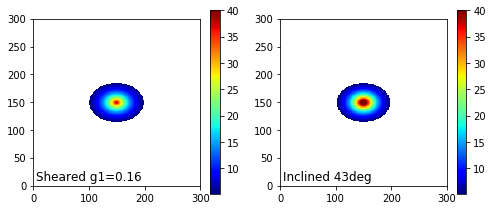

In [356]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.imshow(im1[100:400,100:400],origin='lower',cmap='jet',vmax=40)
plt.text(5,10,'Sheared g1='+np.str(a),color='k',size=12)
#plt.contour(image2.array,origin='lower',levels=[0,1],cmap='Oranges',alpha=0.8)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(im2[100:400,100:400],origin='lower',cmap='jet',vmax=40)
#plt.contour(image2.array,origin='lower',levels=[0,1],cmap='Oranges',alpha=0.8)
plt.text(5,10,'Inclined '+np.str(b)+'deg',color='k',size=12)
plt.colorbar()
plt.tight_layout()

In [357]:
gal = galsim.Exponential(scale_radius=2,flux=1e5)
image5 = gal.drawImage(image=galsim.Image(500,500),scale=0.1)

p10,d10 = oned_profile(image5.array)

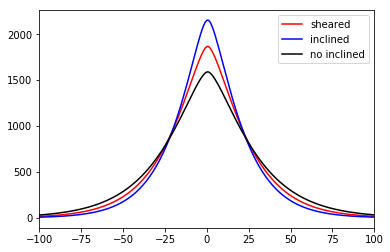

In [358]:
plt.plot(d1,p1,c='r',label='sheared')
plt.plot(d2,p2,c='b',label='inclined')
plt.plot(d10,p10,c='k',label='no inclined')
plt.xlim([-100,100])
plt.legend()

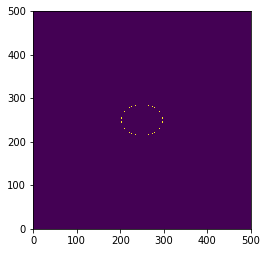

In [359]:
im4=np.zeros_like(im2)
im4[np.isnan(im2) != np.isnan(im1)]=1
plt.imshow(im4,origin='lower')

In [360]:
random_seed = 13
rng = galsim.BaseDeviate(random_seed+1)

a=0.16
gal = galsim.Exponential(scale_radius=2,flux=1e5)
gal = gal.shear(g1=a, g2=0)
psf = galsim.Moffat(beta=5, flux=1., half_light_radius=0.18)
gal = galsim.Convolve([gal, psf])
image1 = gal.drawImage(image=galsim.Image(500,500),scale=0.1)
image1.addNoise(galsim.PoissonNoise(rng,sky_level=1))

b=43
inc = galsim.Angle(b,unit=galsim.degrees)
gal = galsim.InclinedExponential(inc,scale_radius=2,flux=1e5)
psf = galsim.Moffat(beta=5, flux=1., half_light_radius=0.18)
gal = galsim.Convolve([gal, psf])
image2 = gal.drawImage(image=galsim.Image(500,500),scale=0.1)
image2.addNoise(galsim.PoissonNoise(rng,sky_level=1))

im1,im2 = image1.array,image2.array
p1,d1 = oned_profile(im1)
p2,d2 = oned_profile(im2)

im1[im1<1] = np.nan
im2[im2<1] = np.nan

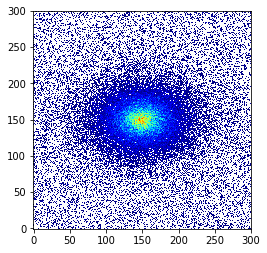

In [361]:
plt.imshow(im1[100:400,100:400],origin='lower',cmap='jet')#,vmax=0.0005)

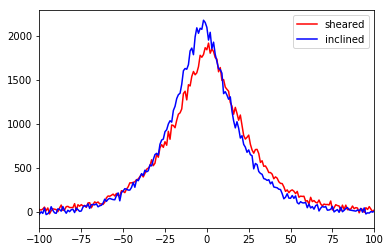

In [362]:
plt.plot(d1,p1,c='r',label='sheared')
plt.plot(d2,p2,c='b',label='inclined')
plt.xlim([-100,100])
plt.legend()

In [ ]:
how to add third dimension?